#Name: Krish Thapa Magar
#Student ID: 2417379

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/MyDrive/Datasets/car_price_dataset.csv'
df = pd.read_csv(file_path)
print(df.head(10))

        Brand     Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia       Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet    Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes       GLA  2020          4.2    Diesel       Automatic   231440   
3        Audi        Q5  2023          2.0  Electric          Manual   160971   
4  Volkswagen      Golf  2003          2.6    Hybrid  Semi-Automatic   286618   
5      Toyota     Camry  2007          2.7    Petrol       Automatic   157889   
6       Honda     Civic  2010          3.4  Electric       Automatic   139584   
7         Kia  Sportage  2001          4.7  Electric  Semi-Automatic   157495   
8         Kia  Sportage  2014          2.6    Hybrid          Manual    98700   
9      Toyota      RAV4  2005          3.1    Petrol          Manual   107724   

   Doors  Owner_Count  Price  
0      3            5   8501  
1      2            3  12092  
2      4       

#**3.1 Classification Task**
#1.Exploratory Data Analysis and Data Understanding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB
        Brand   Model  Year  Engine_Size Fuel_Type    Transmission  Mileage  \
0         Kia     Rio  2020          4.2    Diesel          Manual   289944   
1   Chevrolet  Malibu  2012          2.0    Hybrid       Automatic     5356   
2    Mercedes     GLA  2020          4.2    Diesel       Automatic   231440

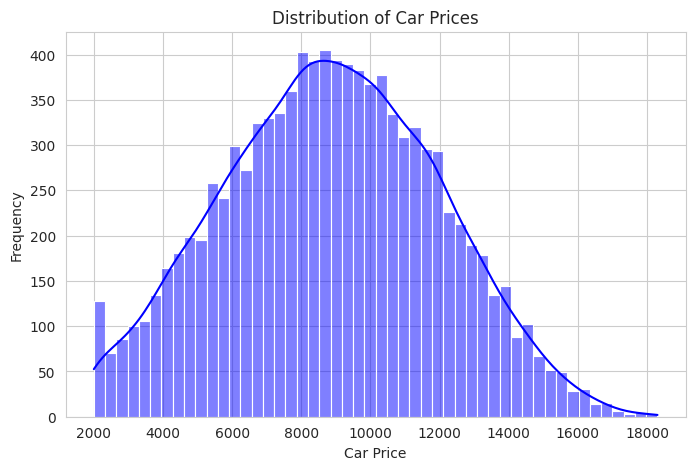

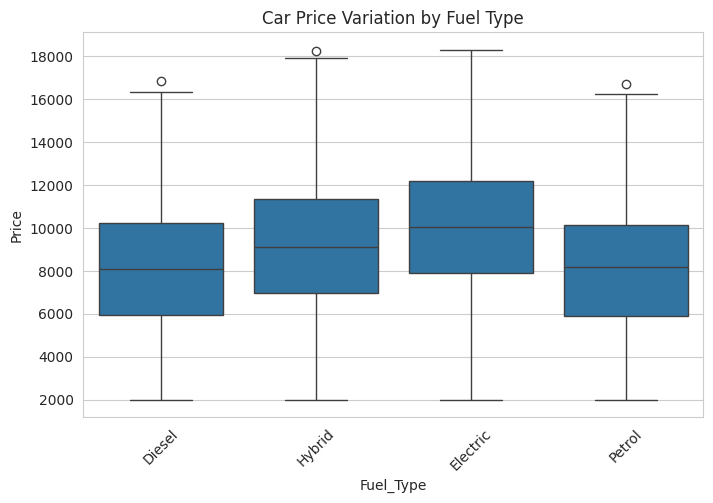

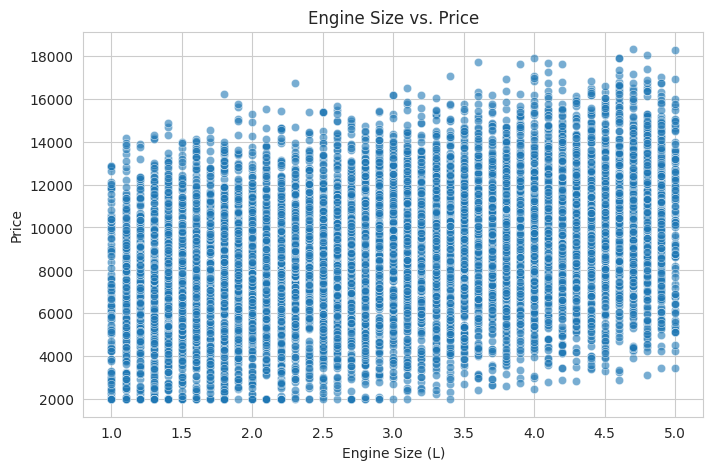

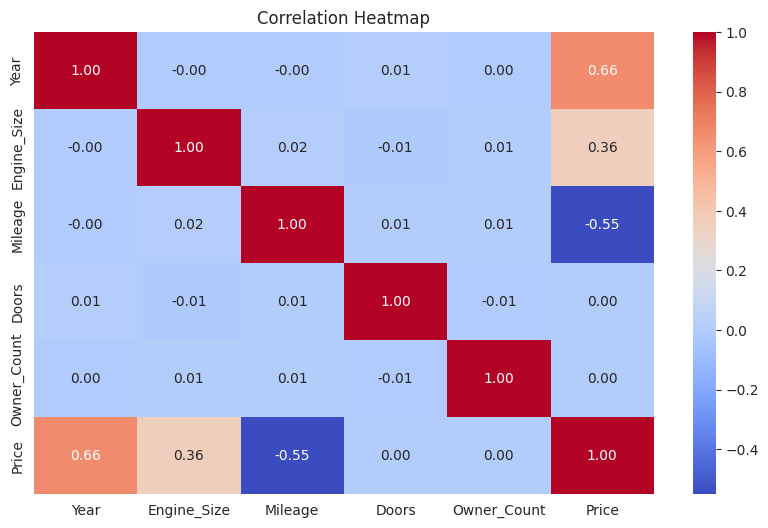

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information
df.info()
print(df.head())

# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Set style for plots
sns.set_style("whitegrid")

# Distribution of car prices
plt.figure(figsize=(8, 5))
sns.histplot(df["Price"], bins=50, kde=True, color="blue")
plt.xlabel("Car Price")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()

# Fuel type vs. Price
plt.figure(figsize=(8, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df)
plt.xticks(rotation=45)
plt.title("Car Price Variation by Fuel Type")
plt.show()

# Scatter plot: Engine Size vs. Price
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Engine_Size", y="Price", data=df, alpha=0.6)
plt.title("Engine Size vs. Price")
plt.xlabel("Engine Size (L)")
plt.ylabel("Price")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#**2.Build A Model From Scratch**


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Binary classification: Define high price vs low price threshold
threshold = df['Price'].median()
df['High_Price'] = (df['Price'] > threshold).astype(int)

# Select features and target
features = ['Year', 'Engine_Size', 'Mileage', 'Owner_Count']
X = df[features].values
y = df['High_Price'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize weights and bias
n_features = X_train.shape[1]
w = np.zeros(n_features)
b = 0

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Training model using Gradient Descent
def train_logistic_regression(X, y, w, b, learning_rate=0.01, epochs=1000):
    m = X.shape[0]
    for _ in range(epochs):
        z = np.dot(X, w) + b
        predictions = sigmoid(z)

        # Compute gradients
        dw = (1/m) * np.dot(X.T, (predictions - y))
        db = (1/m) * np.sum(predictions - y)

        # Update weights
        w -= learning_rate * dw
        b -= learning_rate * db

    return w, b

# Train model
w, b = train_logistic_regression(X_train, y_train, w, b)

# Predict function
def predict(X, w, b):
    return (sigmoid(np.dot(X, w) + b) >= 0.5).astype(int)

# Evaluate model
y_pred_train = predict(X_train, w, b)
y_pred_test = predict(X_test, w, b)

# Performance metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test),
    "Recall": recall_score(y_test, y_pred_test),
    "F1 Score": f1_score(y_test, y_pred_test)
}

print("Model Evaluation:", metrics)



Model Evaluation: {'Accuracy': 0.8925, 'Precision': 0.9, 'Recall': 0.8903976721629486, 'F1 Score': 0.8951730862993662}


#**3. Build a Primary Model**


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Select features and target
features = ['Year', 'Engine_Size', 'Mileage', 'Owner_Count']
X = df[features].values
y = df['High_Price'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    metrics = {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }
    return metrics

# Evaluate both models
log_metrics = evaluate_model(y_test, y_pred_log, "Logistic Regression")
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Print evaluation results
print("Model Performance:")
print(log_metrics)
print(rf_metrics)

Model Performance:
{'Model': 'Logistic Regression', 'Accuracy': 0.892, 'Precision': 0.9054726368159204, 'Recall': 0.8826382153249273, 'F1 Score': 0.8939096267190569}
{'Model': 'Random Forest', 'Accuracy': 0.878, 'Precision': 0.8923230309072782, 'Recall': 0.8680892337536372, 'F1 Score': 0.880039331366765}


#**4.Hyper Parameter Optimization with Cross-Validation**



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Binary classification: Define high price vs low price threshold
threshold = df['Price'].median()
df['High_Price'] = (df['Price'] > threshold).astype(int)

# Select features and target
features = ['Year', 'Engine_Size', 'Mileage', 'Owner_Count']
X = df[features].values
y = df['High_Price'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hyperparameter tuning for Logistic Regression
log_reg = LogisticRegression()
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid_search_log = GridSearchCV(log_reg, param_grid_log, cv=5, scoring='accuracy')
grid_search_log.fit(X_train, y_train)
best_log_model = grid_search_log.best_estimator_

# Hyperparameter tuning for Random Forest
rf = RandomForestClassifier()
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_iter=10, random_state=42)
random_search_rf.fit(X_train, y_train)
best_rf_model = random_search_rf.best_estimator_

# Evaluate best models
y_pred_log = best_log_model.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)

# Print best hyperparameters and accuracy
print("Best Logistic Regression Parameters:", grid_search_log.best_params_)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Best Random Forest Parameters:", random_search_rf.best_params_)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Logistic Regression Parameters: {'C': 0.01, 'solver': 'liblinear'}
Logistic Regression Accuracy: 0.8925
Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Random Forest Accuracy: 0.879


#**5. Feature Selection**

In [ ]:
from sklearn.feature_selection import RFE

# Binary classification: Define high price vs low price threshold
threshold = df['Price'].median()
df['High_Price'] = (df['Price'] > threshold).astype(int)

# Select features and target
features = ['Year', 'Engine_Size', 'Mileage', 'Owner_Count']
X = df[features]
y = df['High_Price']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Recursive Feature Elimination (RFE) with Logistic Regression
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=3)
rfe.fit(X_scaled, y)

# Selected Features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())


Selected Features: ['Year', 'Engine_Size', 'Mileage']


#**6.Final Model**

In [ ]:

# Define high price vs low price threshold
threshold = df['Price'].median()
df['High_Price'] = (df['Price'] > threshold).astype(int)

# Selected features from Feature Selection task
selected_features = ['Year', 'Engine_Size', 'Mileage']
X = df[selected_features]
y = df['High_Price']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train optimized Logistic Regression model
log_reg = LogisticRegression(C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Train optimized Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

log_metrics = evaluate_model(y_test, y_pred_log, "Logistic Regression")
rf_metrics = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Print evaluation results
print("Final Model Performance:")
print(log_metrics)
print(rf_metrics)

Final Model Performance:
{'Model': 'Logistic Regression', 'Accuracy': 0.892, 'Precision': 0.9038652130822596, 'Recall': 0.8845780795344326, 'F1 Score': 0.8941176470588236}
{'Model': 'Random Forest', 'Accuracy': 0.881, 'Precision': 0.8898721730580138, 'Recall': 0.8777885548011639, 'F1 Score': 0.8837890625}
